# Bharat Intern - Data Science

## Task 1 : Stock Prediction Using LSTM: 

----By Devalla Ganesh Babu

Stock market prediction and forecasting are crucial tasks in the field of finance. Predicting the future trends and prices of stocks can assist investors, traders, and financial institutions in making informed decisions. In this project, we aim to predict and forecast the stock prices of the company "AMAZON(Amazon.csv)" using a Stacked Long Short-Term Memory (LSTM) model.

In [2]:
# Import main libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for photing and viewing data
import matplotlib.pyplot as plt# plotting library

In [3]:
df=pd.read_csv('F:/Bharat Intern/Amazon.csv')

In [4]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,1997-12-31,5.041667,4.843750,4.875000,5.020833,4446000.0,5.020833
1,1998-01-02,5.000000,4.796875,5.000000,4.958333,1660800.0,4.958333
2,1998-01-05,4.937500,4.708333,4.885417,4.750000,3590400.0,4.750000
3,1998-01-06,4.875000,4.666667,4.697917,4.838542,4174800.0,4.838542
4,1998-01-07,4.833333,4.692708,4.833333,4.781250,2725200.0,4.781250


In [5]:
df.set_index('Date',inplace = True)# Set the date to be the index

In [6]:
# resorting the data
df.index =  pd.to_datetime(df.index,format='%Y-%m-%d')

In [7]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1997-12-31,5.041667,4.843750,4.875000,5.020833,4446000.0,5.020833
1998-01-02,5.000000,4.796875,5.000000,4.958333,1660800.0,4.958333
1998-01-05,4.937500,4.708333,4.885417,4.750000,3590400.0,4.750000
1998-01-06,4.875000,4.666667,4.697917,4.838542,4174800.0,4.838542
1998-01-07,4.833333,4.692708,4.833333,4.781250,2725200.0,4.781250


# Now Plots

Text(0.5, 1.0, 'Amazon Stock at all time')

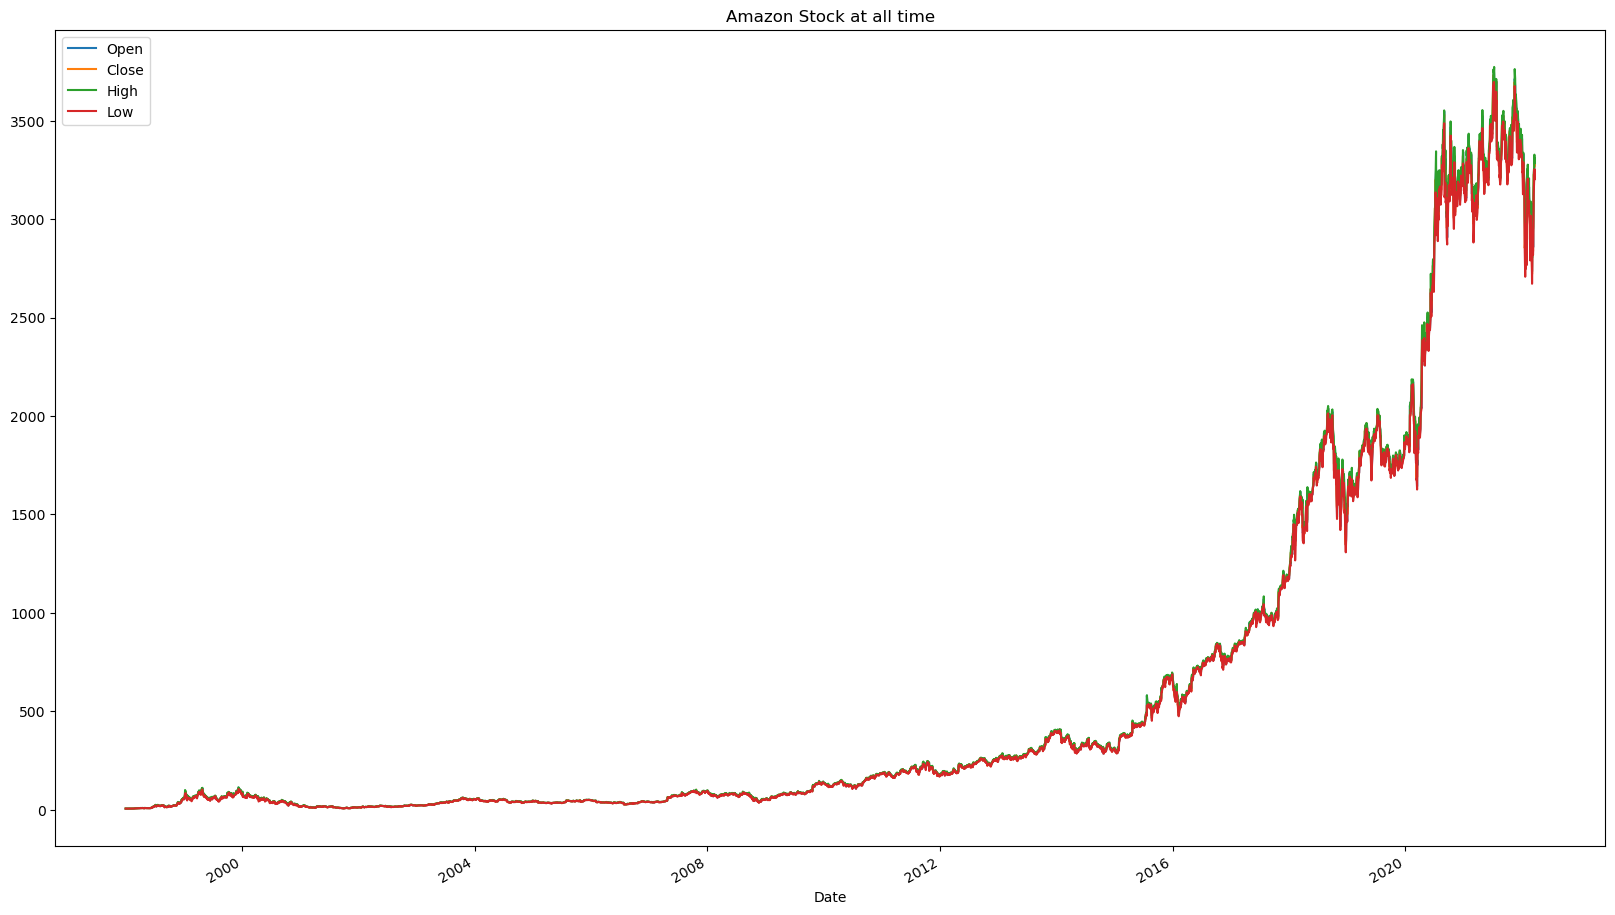

In [8]:
df[['Open','Close','High','Low']].plot(figsize = (20,12))
plt.title('Amazon Stock at all time')

Text(0, 0.5, 'Stock action')

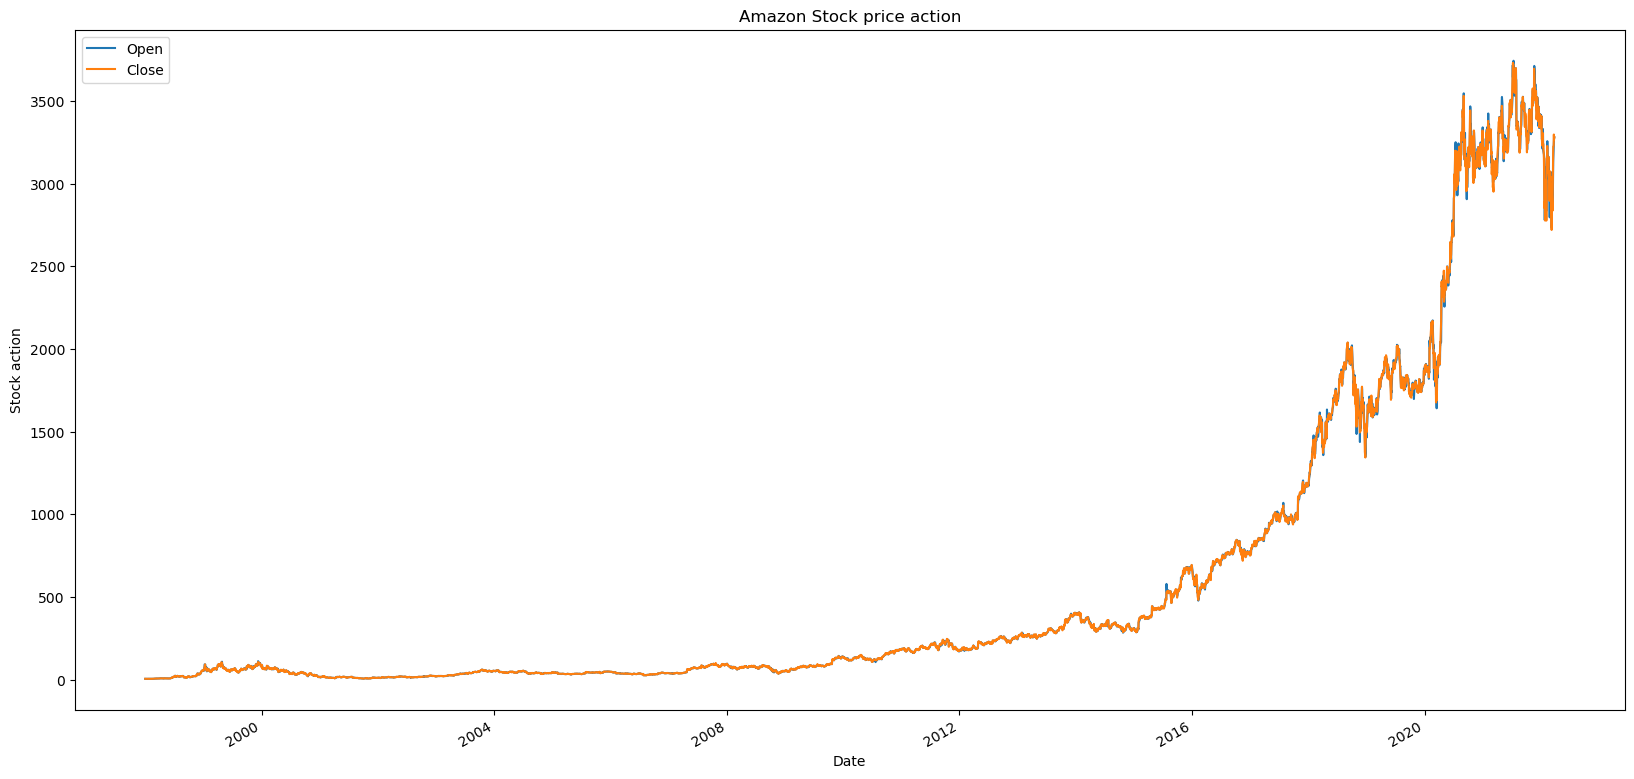

In [9]:
df[['Open','Close']].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

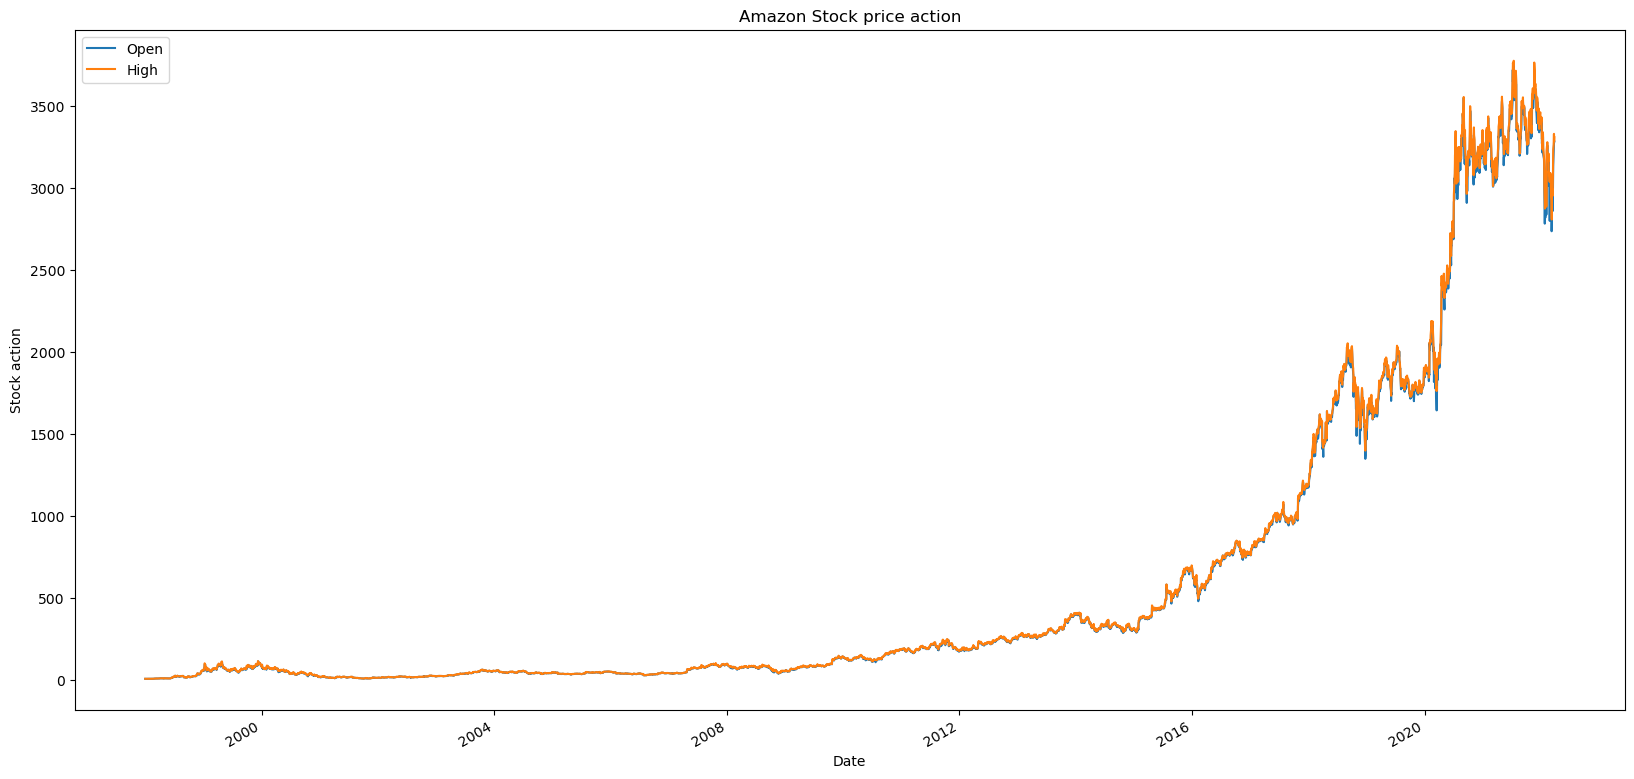

In [10]:
df[['Open','High']].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

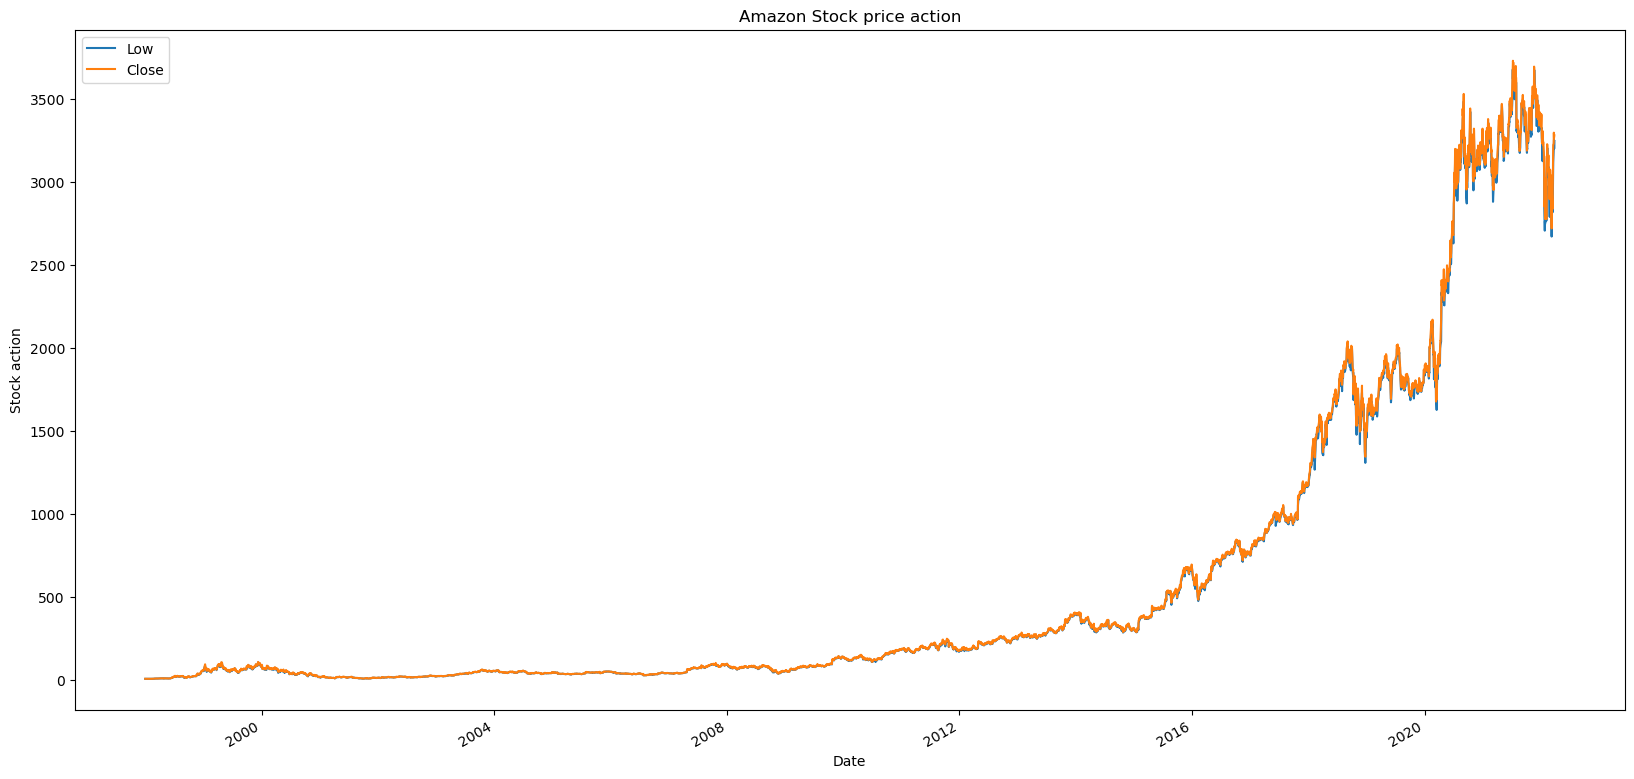

In [11]:
df[['Low','Close']].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

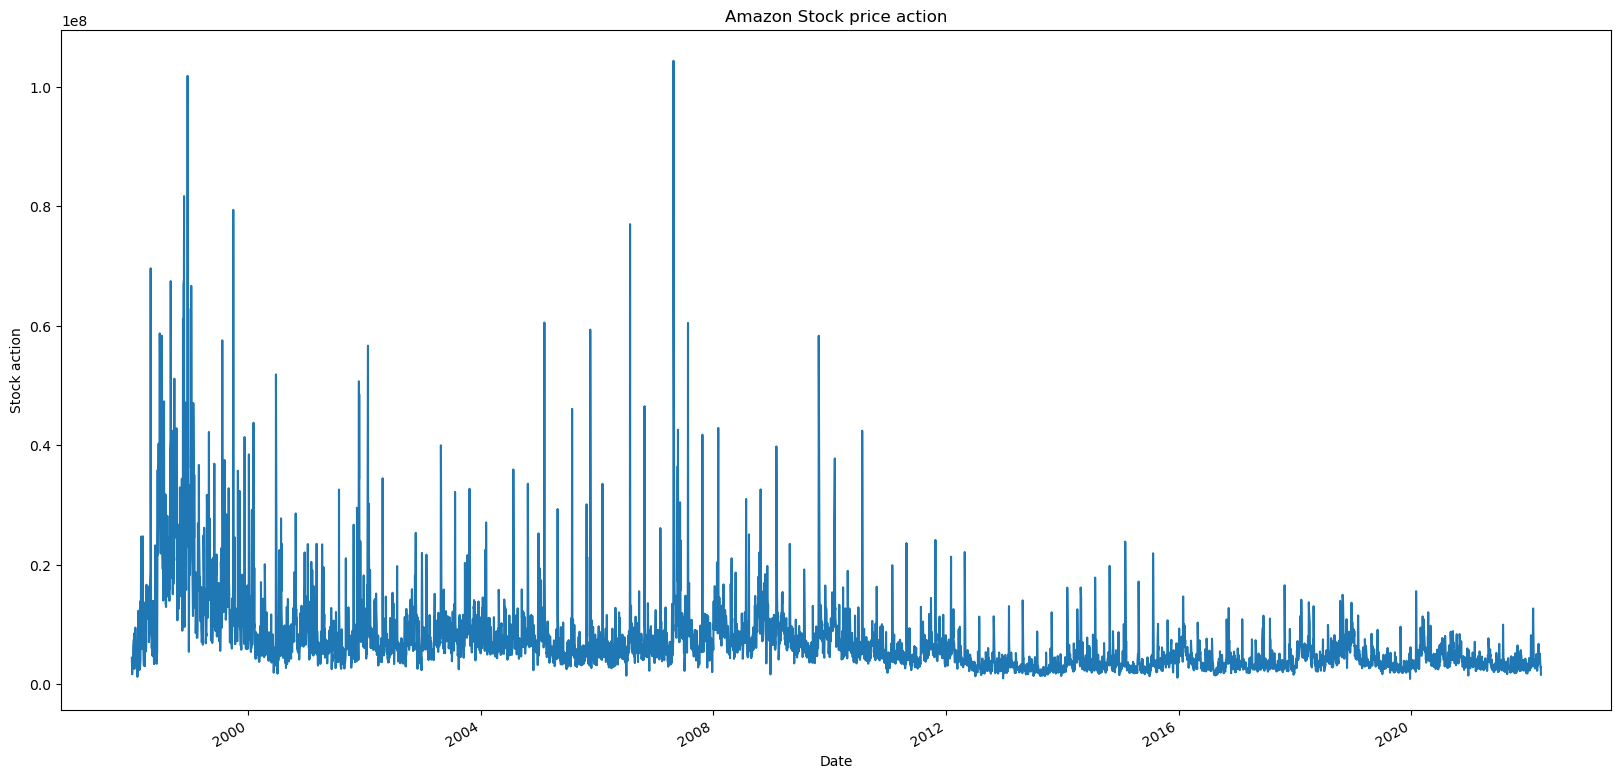

In [12]:
df['Volume'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

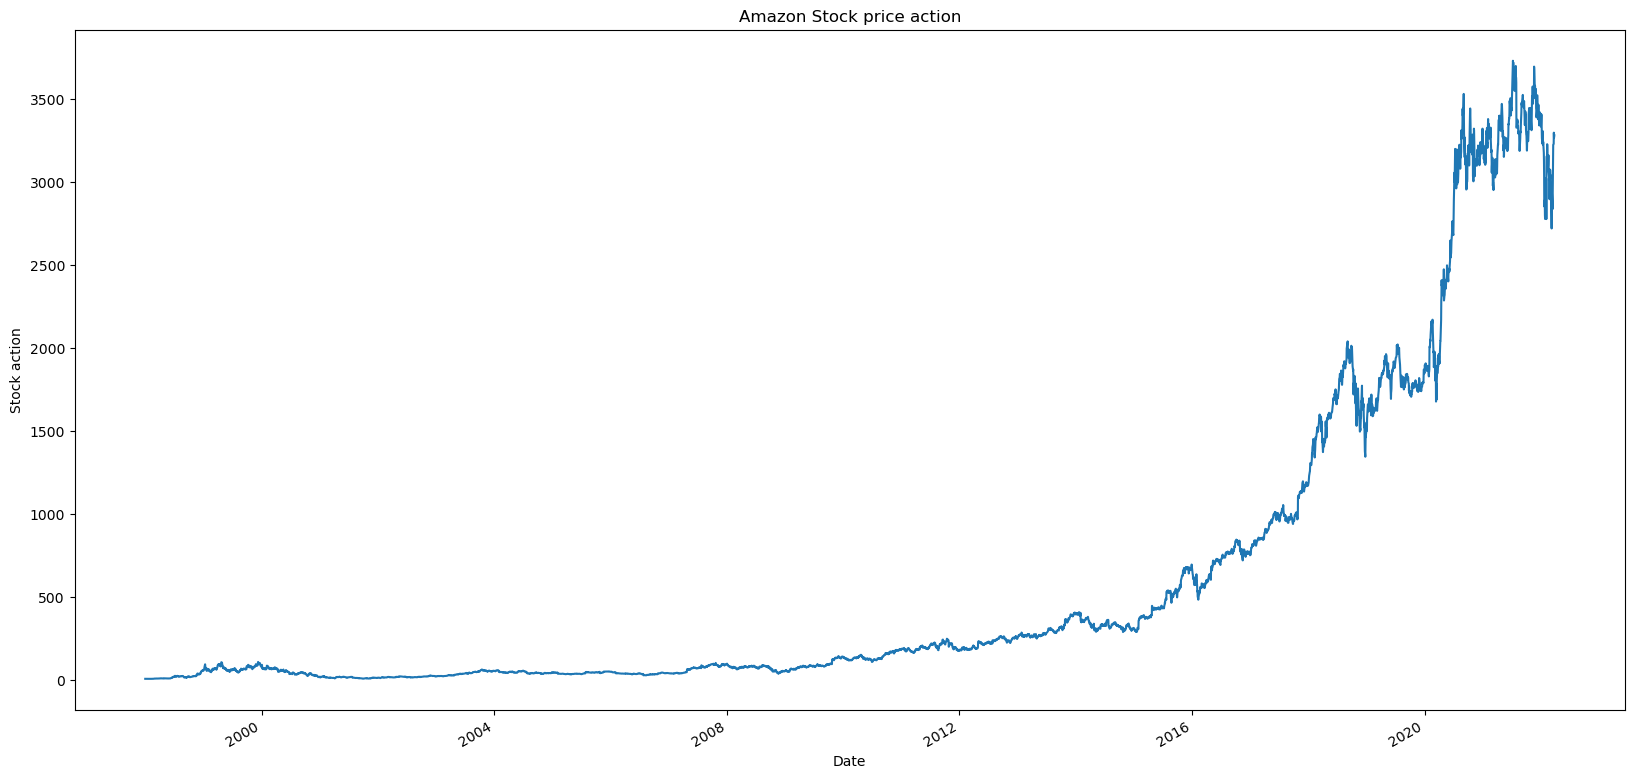

In [13]:
df['Adj Close'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

# From the previous analysis and visualization, it can take the data from 2015 as the previous years doesn't important, not have a stock price variance

Text(0.5, 1.0, 'Amazon Stock Price Action form 2012 to 2021')

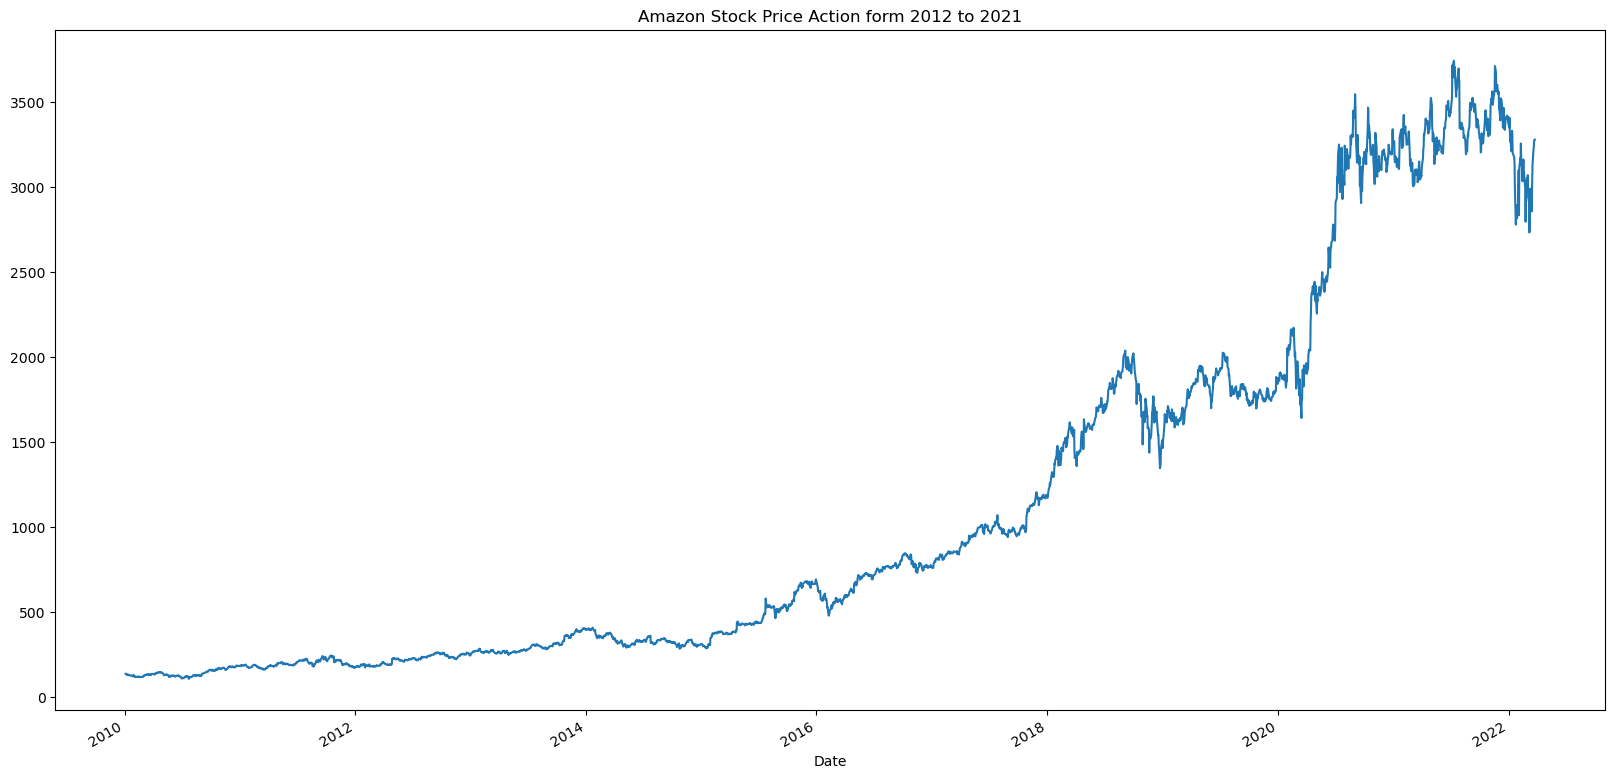

In [14]:
Ama = df['2010':'2022']


Ama['Open'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock Price Action form 2012 to 2021')

Text(0.5, 1.0, 'Amazon Stock Price Action form 2012 to 2021')

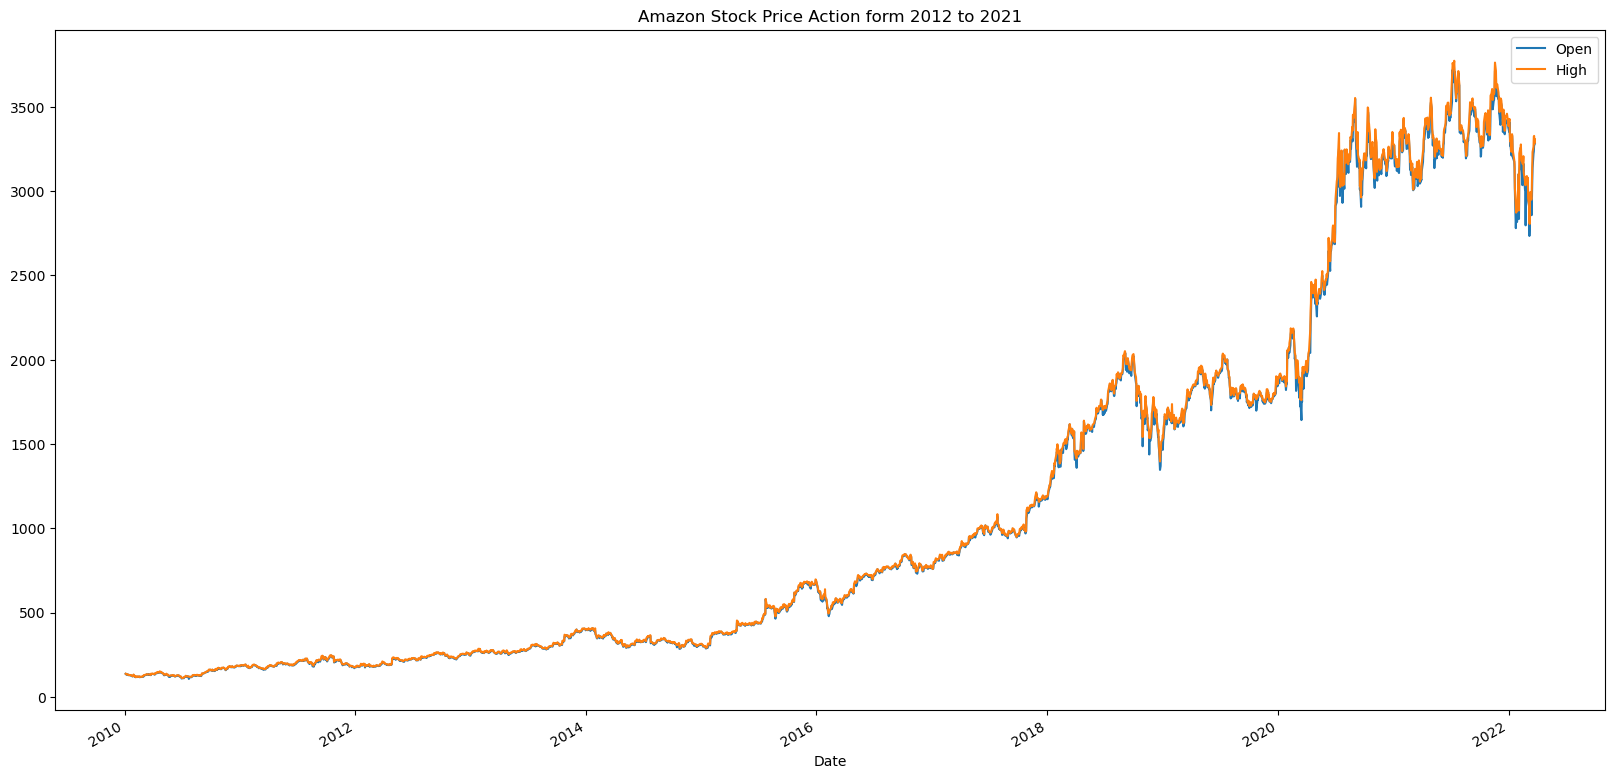

In [15]:
Ama[['Open','High']].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock Price Action form 2012 to 2021')

Text(0.5, 1.0, 'Amazon Stock Price Action form 2010 to 2022')

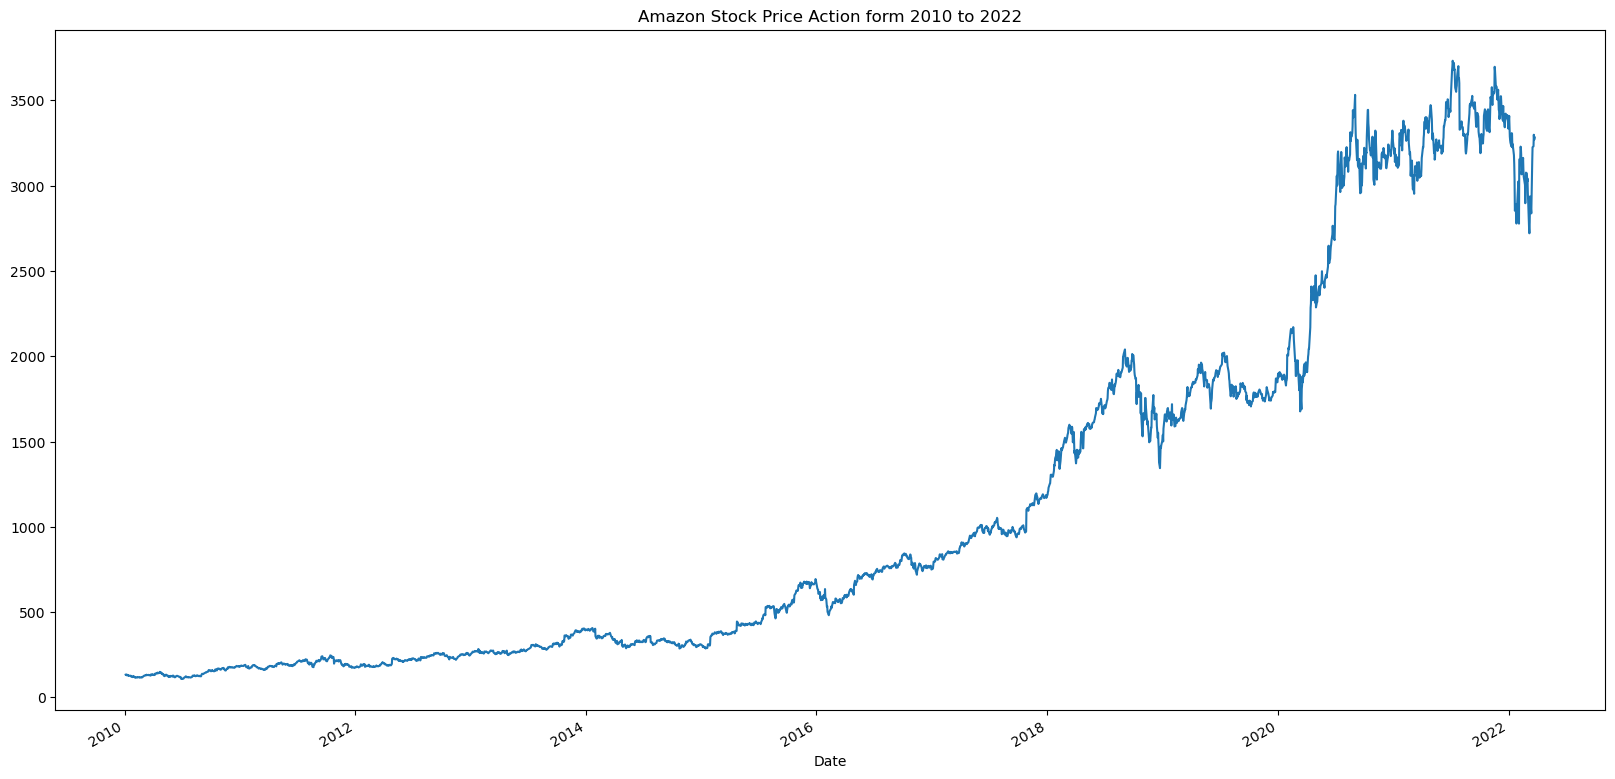

In [16]:
Ama['Adj Close'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock Price Action form 2010 to 2022')

Text(0.5, 1.0, 'Amazon Stock Price Action form 2010 to 2022')

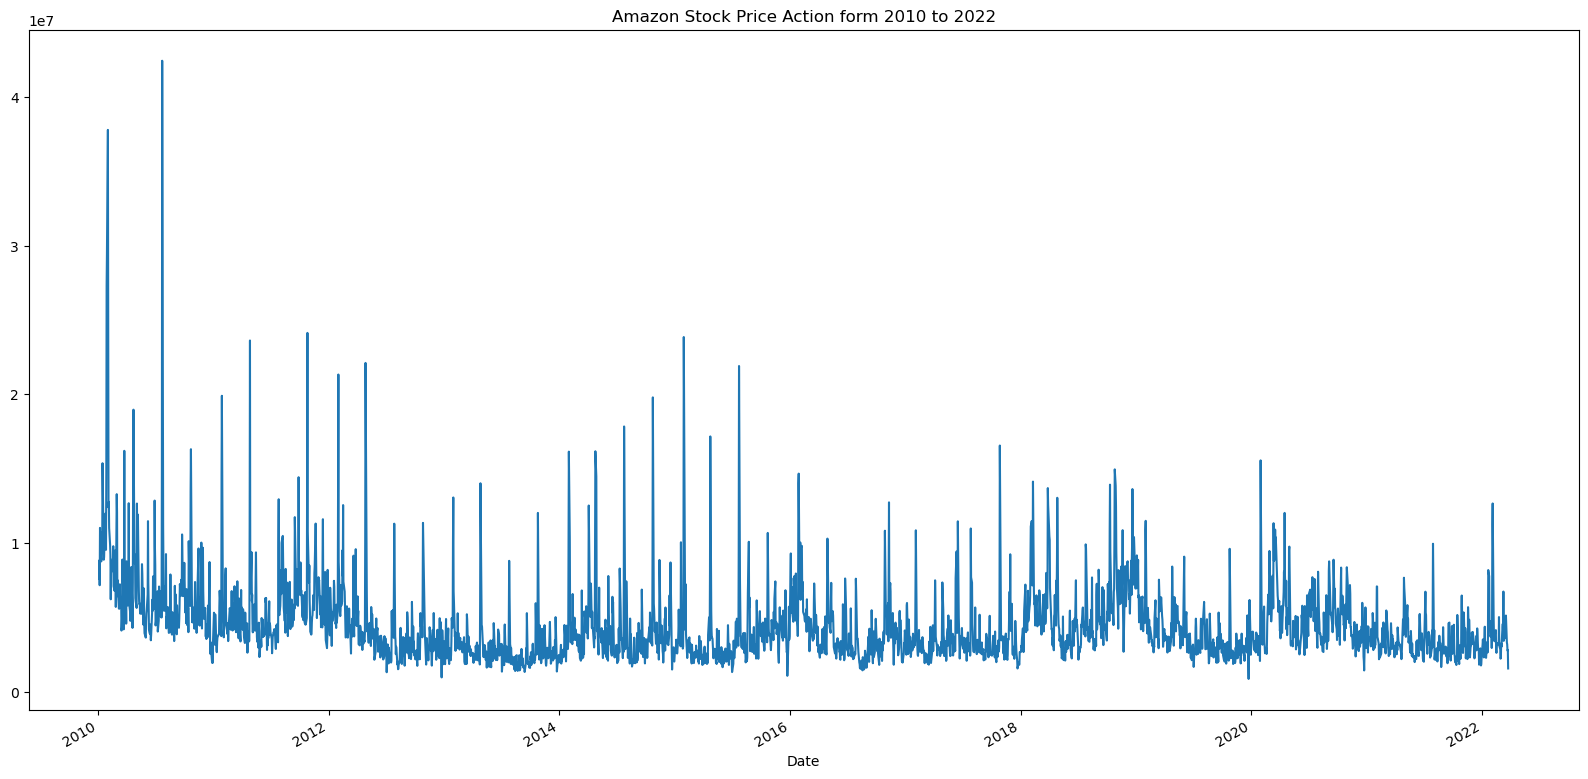

In [17]:
Ama['Volume'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock Price Action form 2010 to 2022')

In [18]:
Ama.describe()

,High,Low,Open,Close,Volume,Adj Close
count,3079.000000,3079.000000,3079.000000,3079.000000,3.079000e+03,3079.000000
mean,1116.621395,1091.651838,1104.820826,1104.411010,4.457763e+06,1104.411010
std,1080.535486,1055.277226,1068.628180,1067.761552,2.700779e+06,1067.761552
min,111.290001,105.800003,105.930000,108.610001,8.813000e+05,108.610001
25%,261.914993,256.779999,259.095001,259.145004,2.814300e+06,259.145004
50%,628.630005,616.250000,624.469971,625.900024,3.760800e+06,625.900024
75%,1792.779968,1757.025024,1775.599976,1776.475037,5.250400e+06,1776.475037
max,3773.080078,3696.790039,3744.000000,3731.409912,4.242110e+07,3731.409912


# Augmented Dickey Fuller Test (ADF)

ADF test is used to determine the presence of unit root in the series, and hence helps in understand if the series is stationary or not

In [19]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [20]:
print(adf_test(df['High']))

Results of Dickey-Fuller Test:
Test Statistic                    2.248104
p-value                           0.998920
#Lags Used                       31.000000
Number of Observations Used    6067.000000
Critical Value (1%)              -3.431428
Critical Value (5%)              -2.862017
Critical Value (10%)             -2.567024
dtype: float64
None


In [21]:
print(adf_test(df['High'].resample('MS').mean()))

Results of Dickey-Fuller Test:
Test Statistic                   1.558802
p-value                          0.997729
#Lags Used                      16.000000
Number of Observations Used    275.000000
Critical Value (1%)             -3.454355
Critical Value (5%)             -2.872108
Critical Value (10%)            -2.572401
dtype: float64
None


Results of Dickey-Fuller Test:
Test Statistic                  -5.390742
p-value                          0.000004
#Lags Used                       3.000000
Number of Observations Used    142.000000
Critical Value (1%)             -3.477262
Critical Value (5%)             -2.882118
Critical Value (10%)            -2.577743
dtype: float64
None


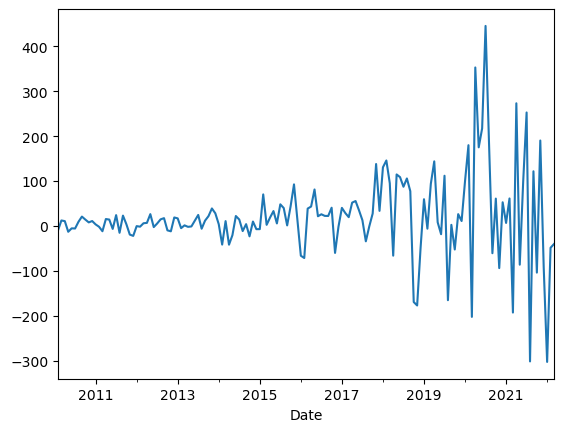

In [22]:
Ama_diff = Ama['Open'].resample('MS').mean() - Ama['Open'].resample('MS').mean().shift(1)
Ama_open_diff = Ama_diff.dropna()
Ama_open_diff.plot()


print(adf_test(Ama_open_diff))

# Kwiatkowski-Phillips-Schmidt-Shin Test (KPSS)

another test for checking the stationarity of a time series

In [23]:
from statsmodels.tsa.stattools import kpss


def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [24]:
kpss_test(Ama['High'])

Results of KPSS Test:
Test Statistic            8.038127
p-value                   0.010000
Lags Used                32.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\DELL\anaconda3\envs\tf-new\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


C:\Users\DELL\AppData\Local\Temp\ipykernel_7416\3429100400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ama["High_diff"] = Ama["High"] - Ama["High"].shift(1)


<Axes: xlabel='Date'>

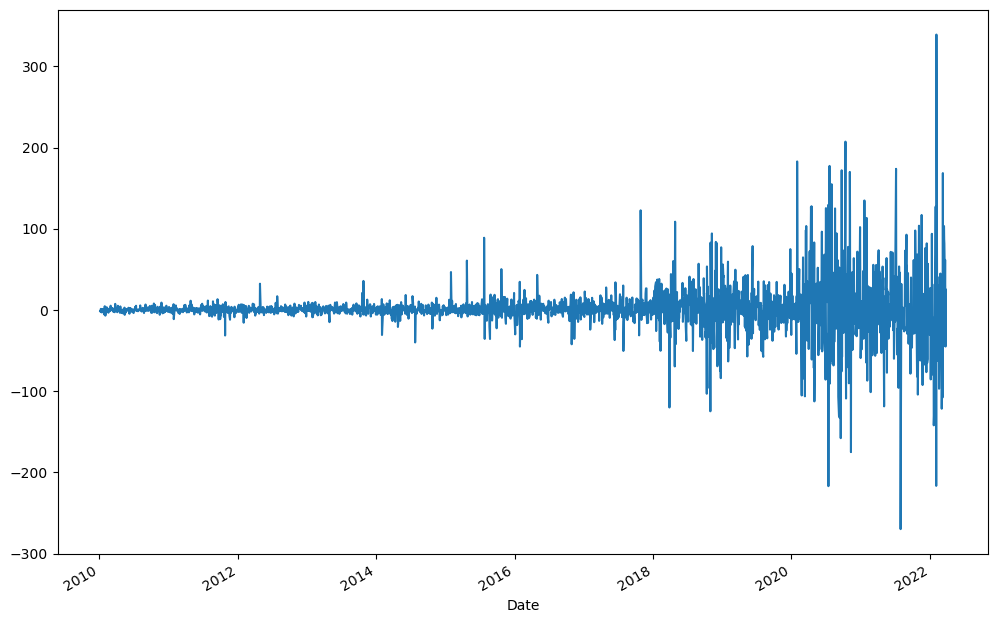

In [25]:
Ama["High_diff"] = Ama["High"] - Ama["High"].shift(1)
Ama["High_diff"].dropna().plot(figsize=(12, 8))

In [26]:
kpss_test(Ama['High_diff'].dropna())

Results of KPSS Test:
Test Statistic           0.25626
p-value                  0.10000
Lags Used                0.00000
Critical Value (10%)     0.34700
Critical Value (5%)      0.46300
Critical Value (2.5%)    0.57400
Critical Value (1%)      0.73900
dtype: float64


C:\Users\DELL\anaconda3\envs\tf-new\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [27]:
kpss_test(Ama['High_diff'].resample('MS').mean().dropna())

Results of KPSS Test:
Test Statistic           0.285843
p-value                  0.100000
Lags Used                1.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\DELL\anaconda3\envs\tf-new\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [28]:
kpss_test(Ama['High_diff'].resample('MS').std().dropna())

Results of KPSS Test:
Test Statistic           1.391378
p-value                  0.010000
Lags Used                8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\DELL\anaconda3\envs\tf-new\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [29]:
adf_test(Ama['High_diff'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                -1.264224e+01
p-value                        1.426592e-23
#Lags Used                     2.600000e+01
Number of Observations Used    3.051000e+03
Critical Value (1%)           -3.432495e+00
Critical Value (5%)           -2.862488e+00
Critical Value (10%)          -2.567275e+00
dtype: float64


# Data Preprocessing

In [30]:
train_Ama = Ama['High'].iloc[:-4]

# Take ramdom  6 variables 

X_train=[]
y_train=[]

for i in range(2, len(train_Ama)):
    X_train.append(train_Ama[i-2:i])
    y_train.append(train_Ama[i])

In [31]:
import math
train_len = math.ceil(len(train_Ama)*0.8)
train_len

2460

In [32]:
# For Model and apply RNN + LSTM
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, TimeDistributed 

In [33]:
X_train, y_train= np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [34]:
model=Sequential()
model.add(LSTM(50,activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(X_train, y_train, epochs=10, batch_size=100, verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 11,701
Trainable params: 11,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
31/31 - 3s - loss: 1122869.8750 - 3s/epoch - 96ms/step
Epoch 2/10
31/31 - 0s - loss: 39448.4102 - 165ms/epoch - 5ms/step
Epoch 3/10
31/31 - 0s - loss: 1635.7296 - 167ms/epoch - 5ms/step
Epoch 4/10
31/31 - 0s - loss: 1059.6088 - 161ms/epoch - 5ms/step
Epoch 5/10
31/31 - 0s - loss: 1033.7518 - 140ms/epoch 

<Axes: >

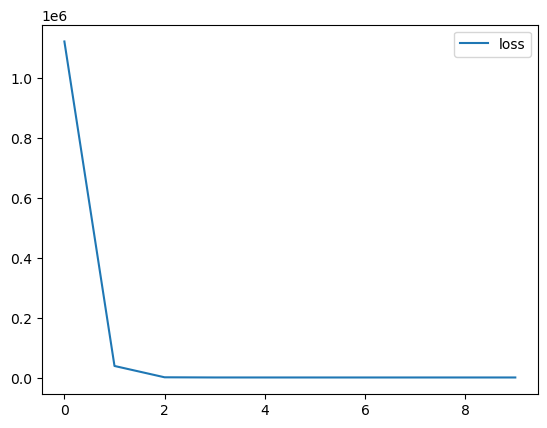

In [36]:
losse = pd.DataFrame(model.history.history)
losse[['loss']].plot()

In [37]:
test_data = train_Ama[train_len-2:]
X_val=[]
Y_val=[] 

for i in range(2, len(test_data)):
    X_val.append(test_data[i-2:i])
    Y_val.append(test_data[i])

In [38]:
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))
prediction = model.predict(X_val)

20/20 [==============================] - 0s 4ms/step


In [39]:
from sklearn.metrics import mean_squared_error
# Know the model error accuracy | the model accuracy 
lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

20/20 [==============================] - 0s 3ms/step
Train rmse: 32.26283351033394
Validation rmse: 64.22687276230326


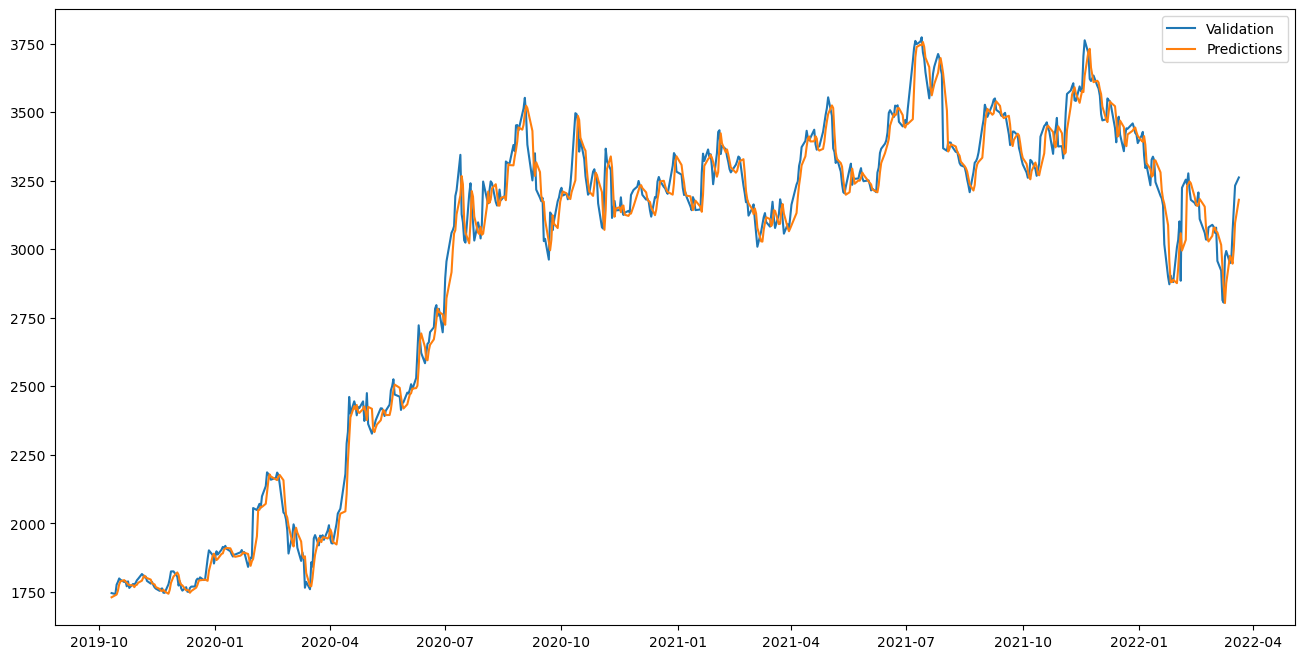

In [40]:
valid = pd.DataFrame(train_Ama[train_len:])
valid['Predictions']=lstm_valid_pred 
plt.figure(figsize=(16,8))
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

In [41]:
# data frame to see the percentage of error between real and predicted

variance = []
for i in range(len(valid)):
  
  variance.append(valid['High'][i]-valid['Predictions'][i])
variance = pd.DataFrame(variance)
variance.describe()

,0
count,615.000000
mean,10.455627
std,63.421695
min,-272.434082
25%,-25.379639
50%,7.118896
75%,42.060181
max,244.812500


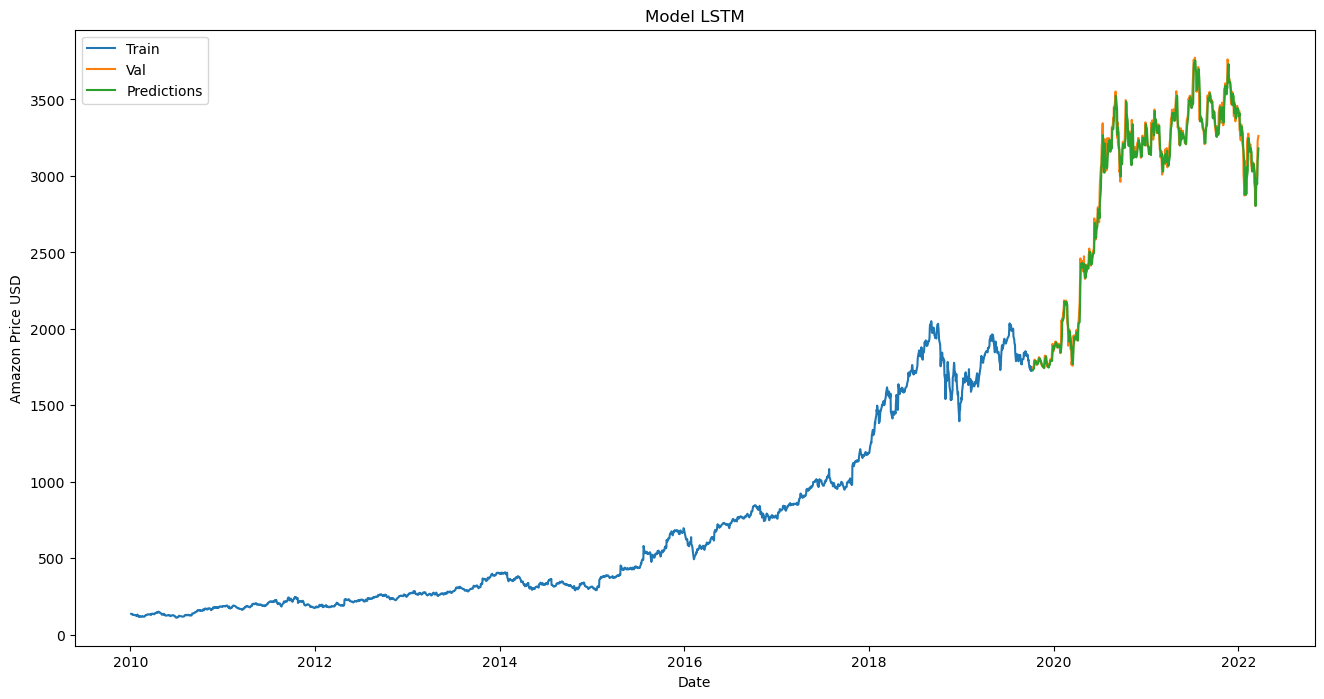

In [42]:
train = train_Ama[:train_len]
valid = pd.DataFrame(train_Ama[train_len:])
valid['Predictions']=lstm_valid_pred

plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Date')
plt.ylabel('Amazon Price USD')
plt.plot(train)
plt.plot(valid[['High','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()

# Results

The results of the Stock Market Prediction and Forecasting project depend on the specific implementation and training of the Stacked LSTM model. By training the model on historical stock price data, we can obtain predictions and forecasts for future stock prices.

The performance of the model can be analyzed using evaluation metrics such as mean absolute error (MAE) and root mean squared error (RMSE). Lower values of these metrics indicate better predictive accuracy. Additionally, visualizations, such as line plots, can be used to compare the predicted and actual stock prices, providing a visual assessment of the model's performance.